# What is Exploratory Data Analysis(EDA)?
If we want to explain EDA in simple terms, it means trying to understand the given data much better, so that we can make some sense out of it.

In statistics, exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.
EDA in Python uses data visualization to draw meaningful patterns and insights. It also involves the preparation of data sets for analysis by removing irregularities in the data.

# Data Sourcing

Data Sourcing is the process of finding and loading the data into our system. Broadly there are two ways in which we can find data.

1. Private Data
2. Public Data

**Private Data**

As the name suggests, private data is given by private organizations. There are some security and privacy concerns attached to it. This type of data is used for mainly organizations internal analysis.

**Public Data**

This type of Data is available to everyone. We can find this in government websites and public organizations etc. Anyone can access this data, we do not need any special permissions or approval.

The very first step of EDA is Data Sourcing


## Import the necessary libraries and store the data in our system for analysis.

In [2]:
import pandas as pd
df = pd.read_csv("Marketing_Analysis.csv", header=[2])
df.head()


,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [3]:
df.shape

(45211, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(7), 

# Data Cleaning

It is very important to get rid of the irregularities and clean the data after sourcing it into our system.


Irregularities are of different types of data.

* Missing Values
* Incorrect Format
* Incorrect Headers
* Anomalies/Outliers

In [5]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)


In [6]:
df.shape

(45111, 19)

## Rreturn the first 10 rows for the object based on position. 

In [7]:
# 10 rows
df[["job title" , "job status"]] = df.jobedu.str.split("," , expand=True)
df = df.drop("jobedu" , axis=1)
df

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job title,job status
0,1,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,2,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,3,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,4,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,5,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000,825,married,yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45207,45208,71.0,55000,1729,divorced,yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired,primary
45208,45209,72.0,55000,5715,married,yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired,secondary
45209,45210,57.0,20000,668,married,yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no,blue-collar,secondary


**Following are the steps to be taken while Fixing Rows and Columns:**
1. Delete Summary Rows and Columns in the Dataset.
2. Delete Header and Footer Rows on every page.
3. Delete Extra Rows like blank rows, page numbers, etc.
4. We can merge different columns if it makes for better understanding of the data
5. Similarly, we can also split one column into multiple columns based on our requirements or understanding.
6. Add Column names, it is very important to have column names to the dataset.


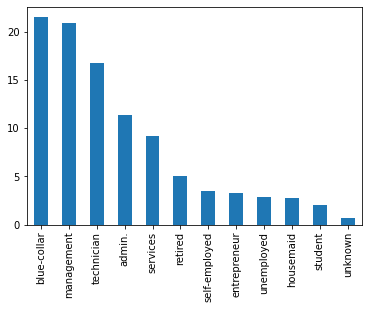

In [8]:
# Fixing Rows and Columns
p1 = df['job title'].value_counts(normalize=True)*100
ax = p1.plot.bar(rot=90)

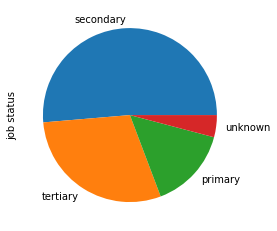

In [9]:
p2 = df['job status'].value_counts(normalize=True)*100
ax = p2.plot.pie(rot=90)

In [10]:
df["salary"].describe()

count     45111.000000
mean      57005.785729
std       32090.324851
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

## Missing Values


Let’s see which columns have missing values in the dataset.


In [11]:
# Let’s see which columns have missing values in the dataset.

Drop the missing Values


In [12]:
# Drop 

## Handling Outliers
Categorical Unordered Univariate Analysis:
An unordered variable is a categorical variable that has no defined order. If we take our data as an example, the job column in the dataset is divided into many sub-categories like technician, blue-collar, services, management, etc. There is no weight or measure given to any value in the ‘job’ column.
Now, let’s analyze the job category by using plots. Since Job is a category, we will plot the bar plot.

In [13]:
# Let's calculate the percentage of each job status category.


#plot the bar graph of percentage job categories


In [14]:

#calculate the percentage of each education category.

#plot the pie chart of education categories


In [15]:
# Describe salary column

# Visualize with Matplotlib

## Scatter Plot


Let’s take three columns ‘Balance’, ‘Age’ and ‘Salary’ from our dataset and see what we can infer by plotting to scatter plot between salary balance and age balance


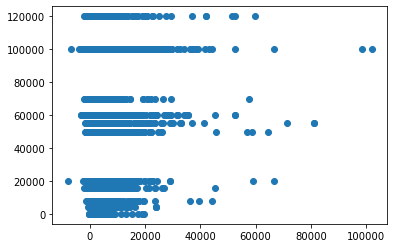

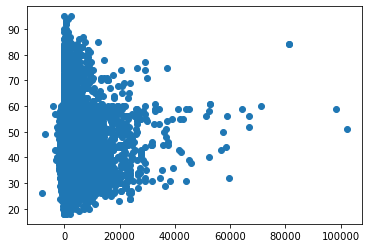

In [16]:
#plot the scatter plot of balance and salary variable in data
import matplotlib.pyplot as plt
plt.scatter(df["balance"],df["salary"])
plt.show()
#plot the scatter plot of balance and age variable in data
plt.scatter(df["balance"],df["age"])
plt.show()

## Pair Plot
Now, let’s plot Pair Plots for the three columns we used in plotting Scatter plots. We’ll use the seaborn library for plotting Pair Plots.

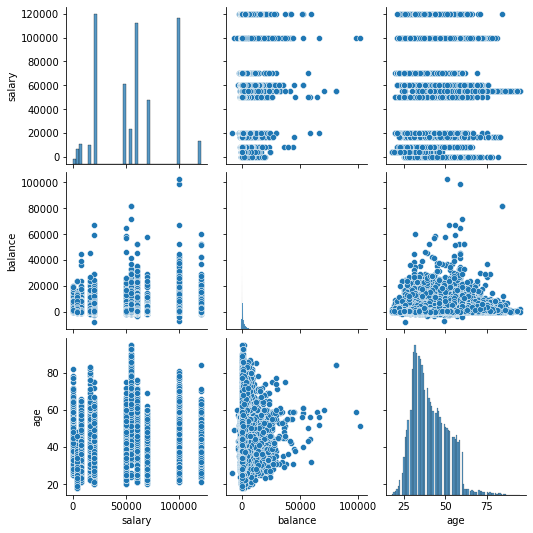

In [17]:
#plot the pair plot of salary, balance and age in data dataframe.
import seaborn as sns
df_new = df[["salary" , "balance" , "age"]]
sns.pairplot(df_new)

## Correlation Matrix


Since we cannot use more than two variables as x-axis and y-axis in Scatter and Pair Plots, it is difficult to see the relation between three numerical variables in a single graph. In those cases, we’ll use the correlation matrix.


              age    salary   balance
age      1.000000  0.024558  0.097802
salary   0.024558  1.000000  0.055207
balance  0.097802  0.055207  1.000000


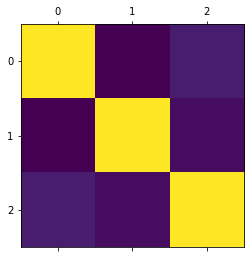

In [18]:
# Creating a matrix using age, salry, balance as rows and columns
df3 = df[["age" , "salary" , "balance"]]
n= df3.corr(method ='pearson')
print(n)
#plot the correlation matrix of salary, balance and age in data dataframe.
plt.matshow(n)
plt.show()

# Numeric - Categorical Analysis
Analyzing the one numeric variable and one categorical variable from a dataset is known as numeric-categorical analysis. We analyze them mainly using mean, median, and box plots.
Let’s take salary and response columns from our dataset.
First check for mean value using groupby

In [19]:
#groupby the response to find the mean of the salary with response no & yes separately.
mean_of_salary = df.groupby("response")['salary'].mean()
print(mean_of_salary)

response
no     56771.917052
yes    58770.411063
Name: salary, dtype: float64


In [27]:
#groupby the response to find the median of the salary with response no & yes separately.
median_of_salary = df.groupby("response")['salary'].median()
print(median_of_salary)

response
no     60000
yes    60000
Name: salary, dtype: int64


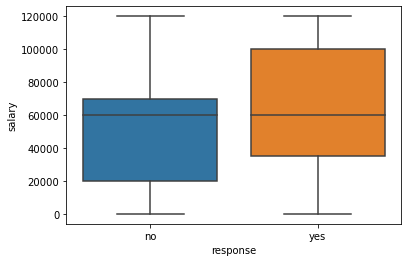

In [28]:
#plot the box plot of salary for yes & no responses.
sns.boxplot(data=df,x='response',y='salary')
plt.show()

# Categorical — Categorical Analysis

In [31]:
import numpy as np
#create response_rate of numerical data type where response "yes"= 1, "no"= 0
df['response_rate'] = np.where(df.response=='yes',1,0)
df.response_rate.value_counts()


0    39832
1     5279
Name: response_rate, dtype: int64

<AxesSubplot:ylabel='marital'>

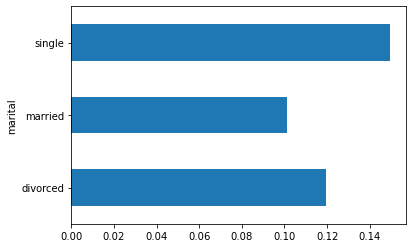

In [33]:
#plot the bar graph of marital status with average value of response_rate
(df.groupby("marital")["response_rate"].mean()).plot.barh()

# Multivariate Analysis
If we analyze data by taking more than two variables/columns into consideration from a dataset, it is known as Multivariate Analysis.
**Let’s see how ‘Education’, ‘Marital’, and ‘Response_rate’ vary with each other.**
First, we’ll create **a pivot table** with the three columns and after that, we’ll create a **heatmap**.

In [23]:
# piovt table 
# heatmap

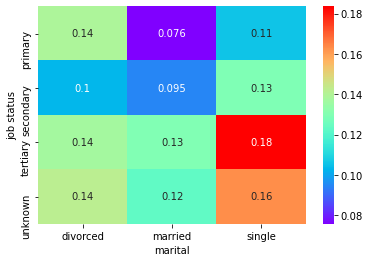

In [35]:
ax = pd.pivot_table(data=df,index='job status',columns='marital',values='response_rate')
sns.heatmap(ax,annot=True, cmap='rainbow')
plt.show()